In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
            img = cv2.resize(img, (512, 512))
            images.append(img)
    return images

In [ ]:
images = load_images_from_folder("../data/hyper-kvasir-dataset-final/dyed-lifted-polyps")

print(images.__len__())

In [ ]:
plt.imshow(images[0])

In [ ]:
test_image = images[0]

print(test_image.shape)
print(test_image[365, 200, :])

# From i=360 to i=532, j=0 to j=205 could exist green patches
green_mark_pixel = test_image[450, 50, :]
print(green_mark_pixel)

In [ ]:
plt.imshow(images[1])

In [ ]:
print(images[1][450, 50, :])

In [ ]:
# Create a function to detect green patches

def detect_green_patches(image):
    green_mark_pixel = image[450, 50, :]
    if green_mark_pixel[1] > 150:
        return True
    else:
        return False

In [ ]:
plt.imshow(images[30])

In [319]:
for index, image in enumerate(images):
    if detect_green_patches(image):
        print(f"Green patch detected in image {index}")
    else:
        print(f"No green patch detected in image {index}")

Green patch detected in image 0
No green patch detected in image 1
Green patch detected in image 2
No green patch detected in image 3
No green patch detected in image 4
No green patch detected in image 5
Green patch detected in image 6
Green patch detected in image 7
Green patch detected in image 8
Green patch detected in image 9
Green patch detected in image 10
No green patch detected in image 11
Green patch detected in image 12
No green patch detected in image 13
Green patch detected in image 14
Green patch detected in image 15
No green patch detected in image 16
Green patch detected in image 17
Green patch detected in image 18
Green patch detected in image 19
No green patch detected in image 20
No green patch detected in image 21
No green patch detected in image 22
Green patch detected in image 23
No green patch detected in image 24
No green patch detected in image 25
No green patch detected in image 26
No green patch detected in image 27
No green patch detected in image 28
No green

In [ ]:
# Create a function to eliminate green patches from images if the image contain a green patche

def eliminate_green_patches(image):

    new_image = image.copy()

    if detect_green_patches(image):
        # Create a full black mask
        mask = np.zeros(image.shape, np.uint8)
        rect = cv2.rectangle(mask, (0, image.shape[1] - 0), (170, image.shape[1] - 170), (255, 255, 255), -1)
        # We want to delete the green patche, so we need to invert the mask
        rect = cv2.bitwise_not(rect)

        # Apply the mask to the image
        new_image = cv2.bitwise_and(image, rect)

    return new_image

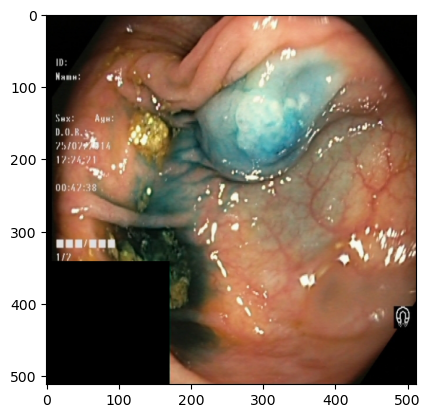

In [317]:
current_image = eliminate_green_patches(images[0])

plt.imshow(current_image)

In [ ]:
# Execute the function for all images

for image in images:
    current_image = eliminate_green_patches(image)
    plt.imshow(current_image)
    plt.show()

In [ ]:
# Create a function to eliminate green patches from images if the image contain a green patche

def eliminate_green_patches_v2(image):

    new_image = image.copy()

    if detect_green_patches(image):
        mask_1 = np.zeros(image.shape, np.uint8)
        mask_2 = np.zeros(image.shape, np.uint8)
        mask_3 = np.zeros(image.shape, np.uint8)

        mask_1 = new_image[:, :, 1] > 160
        mask_2 = new_image[:, :, 2] > 130
        mask_3 = new_image[:, :, 0] < 60

        mask = mask_1 & mask_2 & mask_3
        rect = cv2.rectangle(np.zeros(image.shape, np.uint8), (0, 0), (0, 0), (255, 255, 255), -1)

        for i in range(rect.shape[0]):
            for j in range(rect.shape[1]):
                if mask[i, j]:
                    rect[i, j] = 255

        # We want to delete the green patche, so we need to invert the mask
        rect = cv2.bitwise_not(rect)

        new_image = cv2.bitwise_and(image, rect)

    return new_image

In [ ]:
current_image = eliminate_green_patches_v2(images[0])

plt.imshow(current_image)

In [ ]:
# Create a function to eliminate green patches from images if the image contain a green patche

def eliminate_green_patches_v2(image):

    new_image = image.copy()

    if detect_green_patches(image):
        mask_1 = np.zeros(image.shape, np.uint8)
        mask_2 = np.zeros(image.shape, np.uint8)
        mask_3 = np.zeros(image.shape, np.uint8)

        mask_1 = new_image[:, :, 1] > 160
        mask_2 = new_image[:, :, 2] > 130
        mask_3 = new_image[:, :, 0] < 60

        mask = mask_1 & mask_2 & mask_3

        return mask

    return new_image

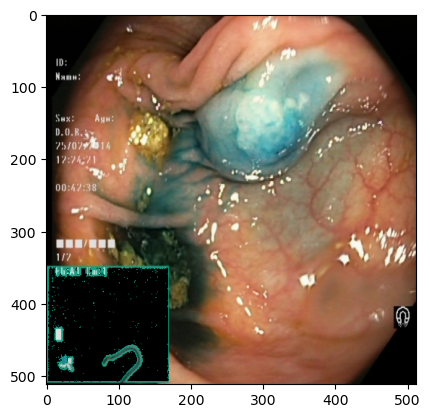

In [318]:
current_image = eliminate_green_patches_v2(images[0])

plt.imshow(current_image)